In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats 

# Pregunta de investigación número 3: 
## ¿Qué países han logrado manejar el problema de manera adecuada?


Para comenzar a responder esta pregunta importo los data sets correspondientes a esta investigación, los cuales se limpiaron el la sección pasada de esta fase:

#Pregunta de investigación número 4: 
## Hipótesis: ¿Está México consciente de la problemática que trae consigo este problema de salud?

In [2]:
#cargo mis archivos correspondientes al interés por búsqueda y al interés por tema
interes_tema = pd.read_csv('https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/Indice_Atencion/interes_mex_2013_2020_clean.csv', index_col=0)
interes_busqueda = pd.read_csv('https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/Indice_Atencion/interes_cancer_de_mama_busqueda_clean.csv', index_col=0)

In [3]:
print(f"el promedio del interés por tema es: {interes_tema['interes_en_cancer'].mean()}")
print(f"la mediana del interés por tema es: {interes_tema['interes_en_cancer'].median()}")
print(f"la media truncada correspondiente es: {stats.trim_mean(interes_tema['interes_en_cancer'], 0.1)}")
print(f"su desviación estándar es de: {interes_tema['interes_en_cancer'].std()}")

el promedio del interés por tema es: 26.835051546391753
la mediana del interés por tema es: 21.0
la media truncada correspondiente es: 21.810126582278482
su desviación estándar es de: 19.734530023735864


In [4]:
print(f"el promedio de interés por búsqueda es: {interes_busqueda['interes_en_cancer'].mean()}")
print(f"la mediana de interés por búsqueda es: {interes_busqueda['interes_en_cancer'].median()}") 
print(f"la media truncada correspondiente es: {stats.trim_mean(interes_busqueda['interes_en_cancer'], 0.1)}")
print(f"su desviación estándar es de: {interes_busqueda['interes_en_cancer'].std()}")

el promedio de interés por búsqueda es: 20.41176470588235
la mediana de interés por búsqueda es: 15.0
la media truncada correspondiente es: 16.507246376811594
su desviación estándar es de: 18.118192723420986


- la diferencia entre la media truncada y la media también nos indica la presencia de outlayers en nuestro conjunto. 

- podemos ver que hay una dispersión grande entre los datos, ya que la desviación estándar es grande con respecto al rango de los valores en ambos casos, ya que van del 0 al 100. 


In [5]:
x = np.arange(0, 1.10, 0.10)

for i in range(len(x)):
  if i != 0: 
    print(f" el cuantil {round(x[i]*100, 1)} es: {interes_tema['interes_en_cancer'].quantile(x[i])}")

for i in range(len(x)):
  if i!=0:
    print(f"el cuantil {round(x[i]*100, 1)} es: {interes_busqueda['interes_en_cancer'].quantile(x[i])}")

 el cuantil 10.0 es: 16.0
 el cuantil 20.0 es: 18.0
 el cuantil 30.0 es: 19.0
 el cuantil 40.0 es: 20.0
 el cuantil 50.0 es: 21.0
 el cuantil 60.0 es: 22.0
 el cuantil 70.0 es: 23.19999999999999
 el cuantil 80.0 es: 27.80000000000001
 el cuantil 90.0 es: 32.0
 el cuantil 100.0 es: 100.0
el cuantil 10.0 es: 8.0
el cuantil 20.0 es: 10.600000000000001
el cuantil 30.0 es: 12.0
el cuantil 40.0 es: 13.0
el cuantil 50.0 es: 15.0
el cuantil 60.0 es: 18.0
el cuantil 70.0 es: 19.799999999999997
el cuantil 80.0 es: 23.200000000000003
el cuantil 90.0 es: 34.60000000000001
el cuantil 100.0 es: 100.0


- Con esto podemos ver que el índice de atención normalmente está por debajo del 30% de atención en búsqueda.

In [6]:
interes_tema['interes_en_cancer'].quantile(0.75) - interes_tema['interes_en_cancer'].quantile(0.25)

7.0

In [7]:
interes_busqueda['interes_en_cancer'].quantile(0.75) - interes_busqueda['interes_en_cancer'].quantile(0.25)

11.0

- Con esto podemos ver que la distancia entre los datos típicos dentro del DS no están tan distanciados entre sí y en realidad la atención que se le da a este problema sí está por debajo al 30% con respecto a los meses donde se focaliza la atención.

#### ahora me concentraré en visualizaciones:

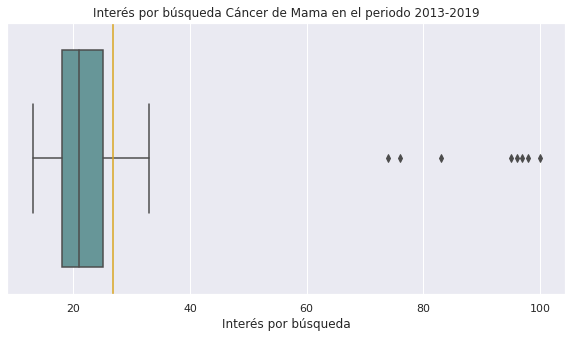

In [8]:
sns.set(style = "darkgrid")

f = plt.figure(figsize=(10,5))

sns.boxplot(x = interes_tema['interes_en_cancer'], color='cadetblue')
plt.axvline (interes_tema['interes_en_cancer'].mean(), c = 'goldenrod')

plt.xlabel('Interés por búsqueda')
plt.title('Interés por búsqueda Cáncer de Mama en el periodo 2013-2019')

plt.show()

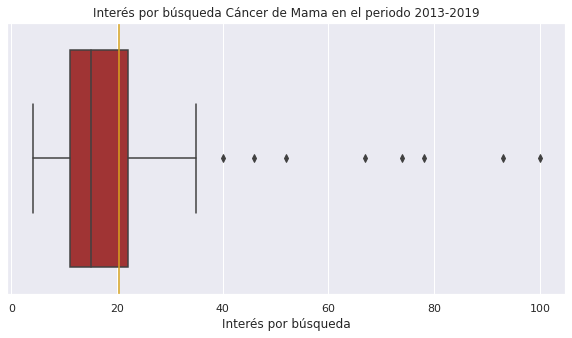

In [9]:
sns.set(style = "darkgrid")

f = plt.figure(figsize=(10,5))

sns.boxplot(x = interes_busqueda['interes_en_cancer'], color='firebrick')
plt.axvline (interes_busqueda['interes_en_cancer'].mean(), c = 'goldenrod')

plt.xlabel('Interés por búsqueda')
plt.title('Interés por búsqueda Cáncer de Mama en el periodo 2013-2019')

plt.show()

#### Como podemos ver, hay algunos outlayers cargados hacia la derecha en ambos casos. Sin embargo, podemos limpiarlos para ver que efectivamente sin ellos la media se ajusta más a la media truncada que se había calculado anteriormente en ambos casos.

In [10]:
# ahora filtro los outlayers: 

def filtro_interq(col, dataframe):
  """esta funcion te da el df filtrado con el filtro inferior y superior de su rango intercuartilico"""
  iqr = col.quantile(0.75) - col.quantile(0.25)
  filtro_inferior = col > col.quantile(0.25) - iqr*1.5
  filtro_superior = col < col.quantile(0.75) + iqr*1.5

  df_filtrado = dataframe[filtro_inferior & filtro_superior]

  return df_filtrado


In [11]:
interes_tema_filtrado = filtro_interq(interes_tema['interes_en_cancer'], interes_tema)
interes_busqueda_filtrado = filtro_interq(interes_busqueda['interes_en_cancer'], interes_busqueda)

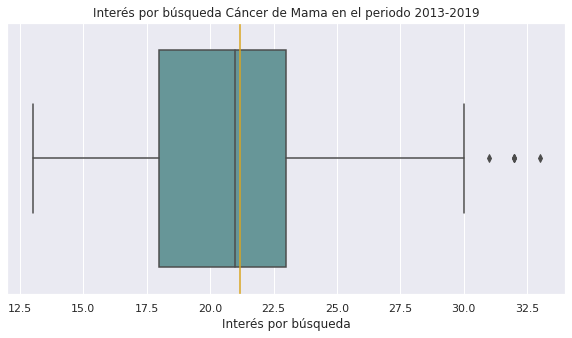

In [12]:
sns.set(style = "darkgrid")

f = plt.figure(figsize=(10,5))

sns.boxplot(x = interes_tema_filtrado['interes_en_cancer'], color='cadetblue')
plt.axvline (interes_tema_filtrado['interes_en_cancer'].mean(), c = 'goldenrod')

plt.xlabel('Interés por búsqueda')
plt.title('Interés por búsqueda Cáncer de Mama en el periodo 2013-2019')

plt.show()

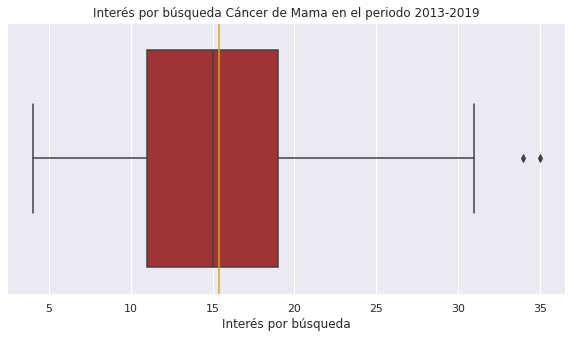

In [13]:
sns.set(style = "darkgrid")

f = plt.figure(figsize=(10,5))

sns.boxplot(x = interes_busqueda_filtrado['interes_en_cancer'], color='firebrick')
plt.axvline (interes_busqueda_filtrado['interes_en_cancer'].mean(), c = 'goldenrod')

plt.xlabel('Interés por búsqueda')
plt.title('Interés por búsqueda Cáncer de Mama en el periodo 2013-2019')

plt.show()

#### Con esto podemos ver que efectivamente la atención que se le da al problema es muy baja con respecto a ambas categorías. Con excepción, claro, al mes donde tiene más atención cada año.

#### para reforzar esta afirmación se procederá a realizar una tabla de frecuencias:

In [14]:
segmentos_busqueda = pd.cut(interes_busqueda['interes_en_cancer'], 10)
segmentos_busqueda.groupby(segmentos_busqueda).count()

interes_en_cancer
(3.904, 13.6]    36
(13.6, 23.2]     32
(23.2, 32.8]      7
(32.8, 42.4]      3
(42.4, 52.0]      2
(52.0, 61.6]      0
(61.6, 71.2]      1
(71.2, 80.8]      2
(80.8, 90.4]      0
(90.4, 100.0]     2
Name: interes_en_cancer, dtype: int64

In [15]:
segmentos_tema = pd.cut(interes_tema['interes_en_cancer'], 10)
segmentos_tema.groupby(segmentos_tema).count()

interes_en_cancer
(12.913, 21.7]    54
(21.7, 30.4]      30
(30.4, 39.1]       5
(39.1, 47.8]       0
(47.8, 56.5]       0
(56.5, 65.2]       0
(65.2, 73.9]       0
(73.9, 82.6]       2
(82.6, 91.3]       1
(91.3, 100.0]      5
Name: interes_en_cancer, dtype: int64

#### Donde podemos ver que la mayor parte del tiempo el interés en búsquedas de Google y el interés en Temas son muy bajos la mayor parte del tiempo.

In [16]:
#ahora realizaré agrupaciones por fecha para ver la concentración de búsquedas y temas en histogramas:

interes_busqueda['fecha'] = pd.to_datetime(interes_busqueda['fecha'])
interes_tema['fecha'] = pd.to_datetime(interes_tema['fecha'])

In [52]:
# agrego una columna que contenga el año
interes_tema['year'] = list(interes_tema.fecha.dt.year)
interes_busqueda['year'] = list(interes_busqueda.fecha.dt.year)

#agrego una columna que contenga el mes
interes_tema['mes'] = list(interes_tema.fecha.dt.month)
interes_busqueda['mes'] = list(interes_busqueda.fecha.dt.month)

#cargo los datos del 2013 al 2019: 
interes_tema = interes_tema[(interes_tema['year'] != 2012) & (interes_tema['year']<2020)]
interes_busqueda = interes_busqueda[interes_busqueda['year']<2020]

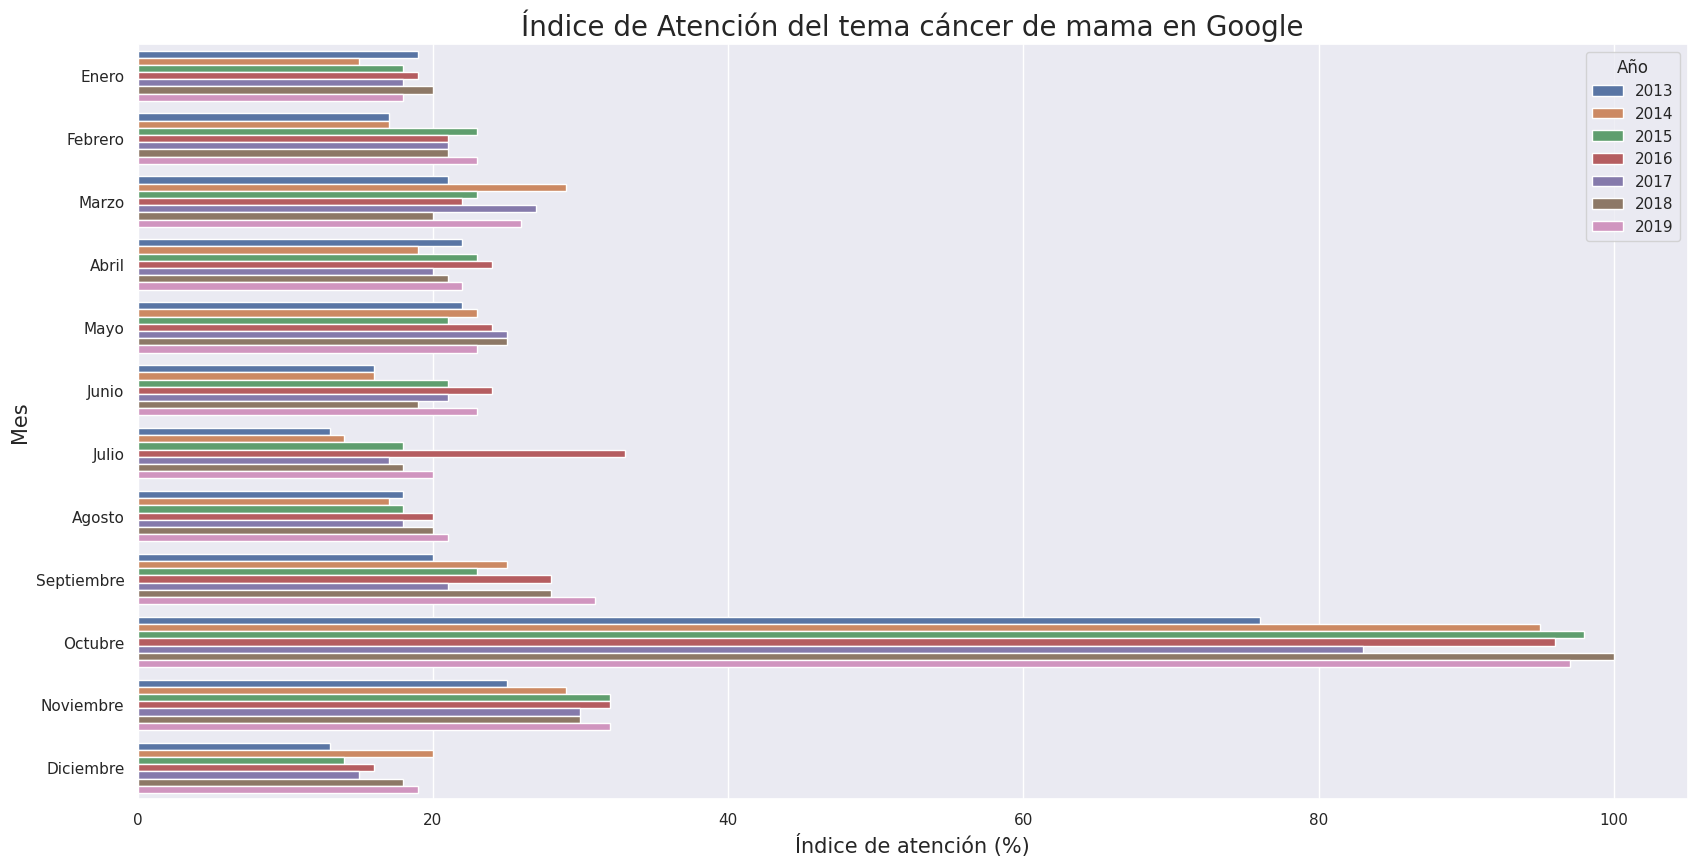

In [56]:
plt.figure(figsize=(20,10), dpi = 100)

ax = sns.barplot(x = interes_tema['interes_en_cancer'], y = interes_tema['mes'], hue ='year' , data = interes_tema ,orient='h')

plt.xlabel('Índice de atención (%)', fontsize = 15)
plt.ylabel('Mes', fontsize = 15)

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.yticks([i for i in range(0,12)], meses)

plt.title('Índice de Atención del tema cáncer de mama en Google', fontsize = 20)

ax.legend(title='Año')

plt.show()

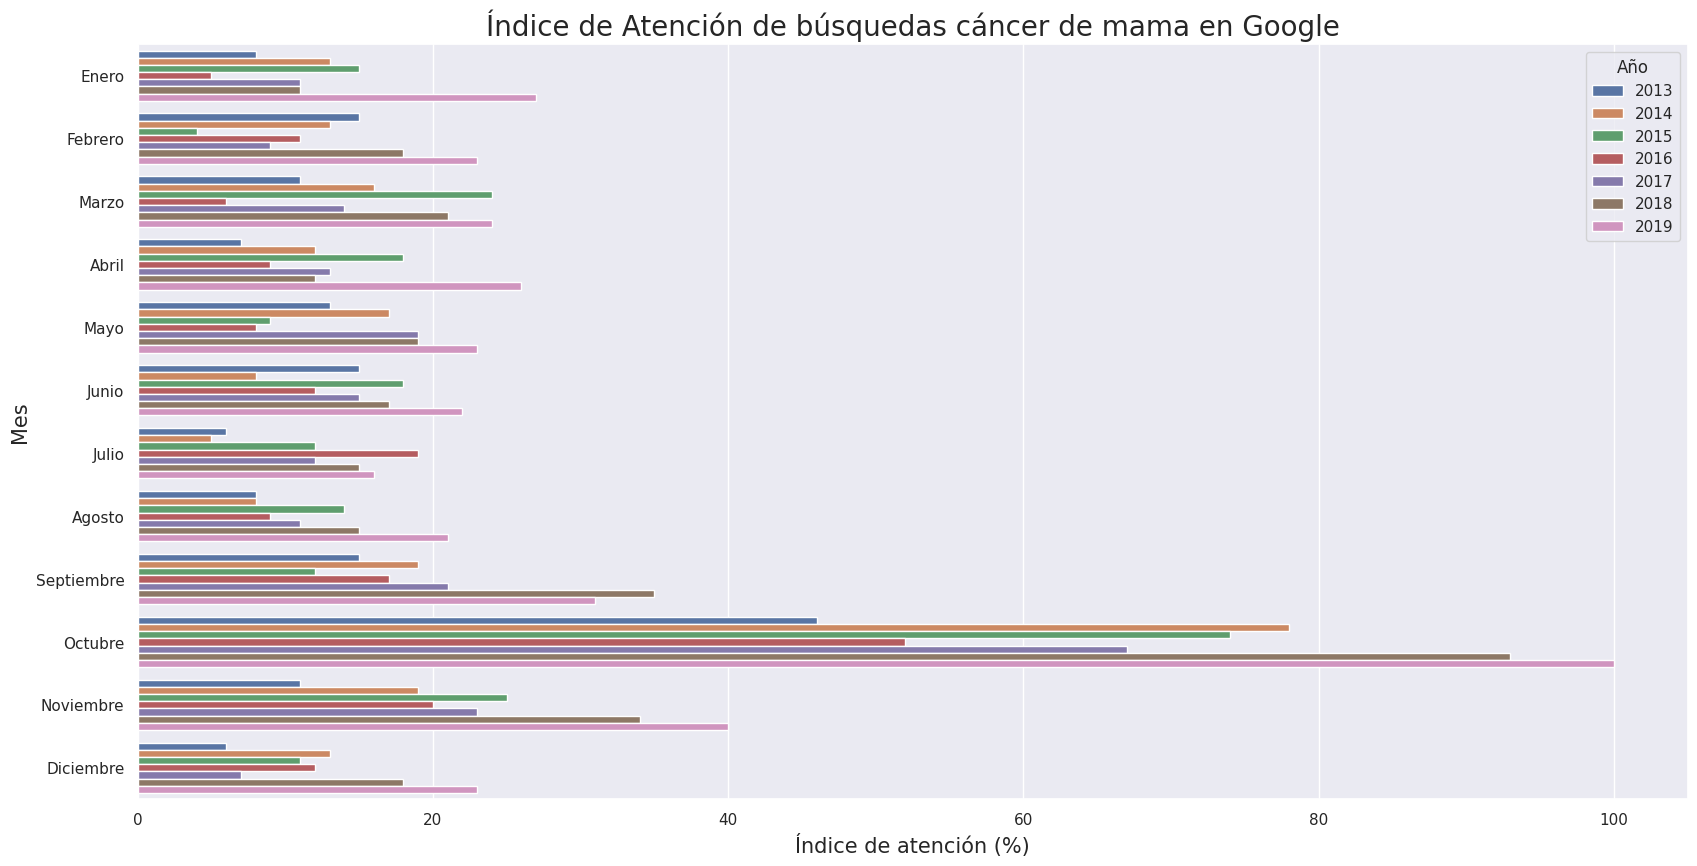

In [57]:
plt.figure(figsize=(20,10), dpi = 100)

ax = sns.barplot(x = interes_busqueda['interes_en_cancer'], y = interes_busqueda['mes'], hue ='year' , data = interes_busqueda ,orient='h')

plt.xlabel('Índice de atención (%)', fontsize = 15)
plt.ylabel('Mes', fontsize = 15)

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.yticks([i for i in range(0,12)], meses)

plt.title('Índice de Atención de búsquedas cáncer de mama en Google', fontsize = 20)

ax.legend(title='Año')

plt.show()

#### A partir de estas visualizaciones podemos ver que hay una carga inmediata de atención en el mes de Octubre, que es Octubre: Mes de Sensibilización sobre el Cáncer de Mama.

#### y esto en particular no representa un problema, de hecho nos dice que el labor que se realiza para sensiblizar y visibilizar el problema funciona, el problema es que fuera de este mes el problema se invisibiliza, ya que el índice de atención fuera de estos meses decae por debajo del 30%.